<a href="https://colab.research.google.com/github/shrutish269/SCT_DS_1/blob/main/Task4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
url = "https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.00000,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,...,16-101(a1),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
2,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,...,13-409(b),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
3,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER OF MOTOR VEHICLE FOLLOWING VEHICLE CLOS...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,...,21-310(a),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
4,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,...,21-801(b),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"


In [3]:
# Step 3: Basic Info & Clean Nulls
df.info()
df = df.dropna(subset=['Time Of Stop', 'Latitude', 'Longitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025647 entries, 0 to 2025646
Data columns (total 43 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SeqID                    object 
 1   Date Of Stop             object 
 2   Time Of Stop             object 
 3   Agency                   object 
 4   SubAgency                object 
 5   Description              object 
 6   Location                 object 
 7   Latitude                 float64
 8   Longitude                float64
 9   Accident                 object 
 10  Belts                    object 
 11  Personal Injury          object 
 12  Property Damage          object 
 13  Fatal                    object 
 14  Commercial License       object 
 15  HAZMAT                   object 
 16  Commercial Vehicle       object 
 17  Alcohol                  object 
 18  Work Zone                object 
 19  Search Conducted         object 
 20  Search Disposition       object 
 21  Search O

In [4]:
# Step 4: Convert Time and Extract Hour
df['Hour'] = pd.to_datetime(df['Time Of Stop'], errors='coerce').dt.hour
df['Date'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()

df = df.dropna(subset=['Hour'])
df['Hour'] = df['Hour'].astype(int)

/tmp/ipython-input-4-117887687.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time Of Stop'], errors='coerce').dt.hour


/tmp/ipython-input-5-3305056058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


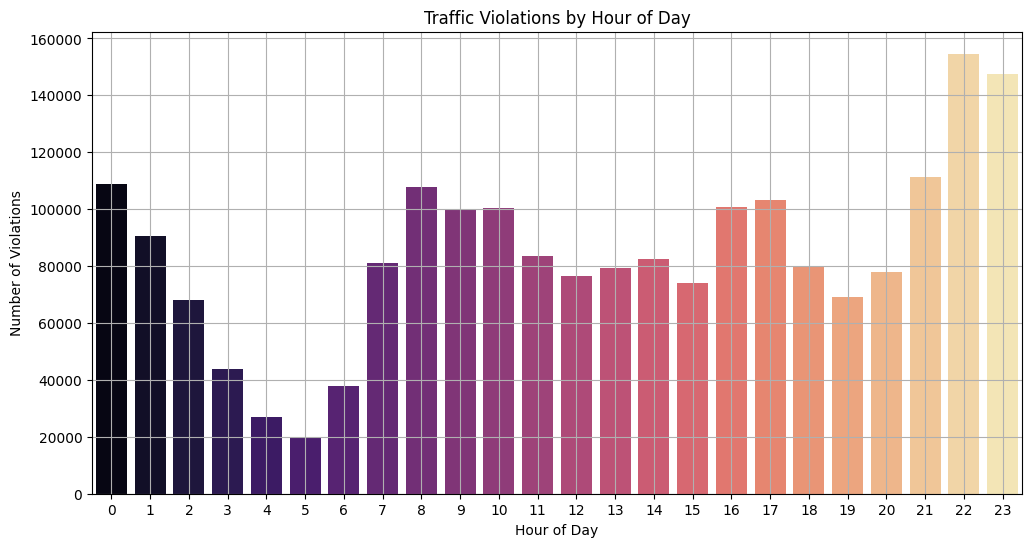

In [5]:
# Step 5: Plot - Violations by Hour of Day
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title('Traffic Violations by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Violations')
plt.grid(True)
plt.show()

/tmp/ipython-input-6-2504983632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=order, palette='coolwarm')


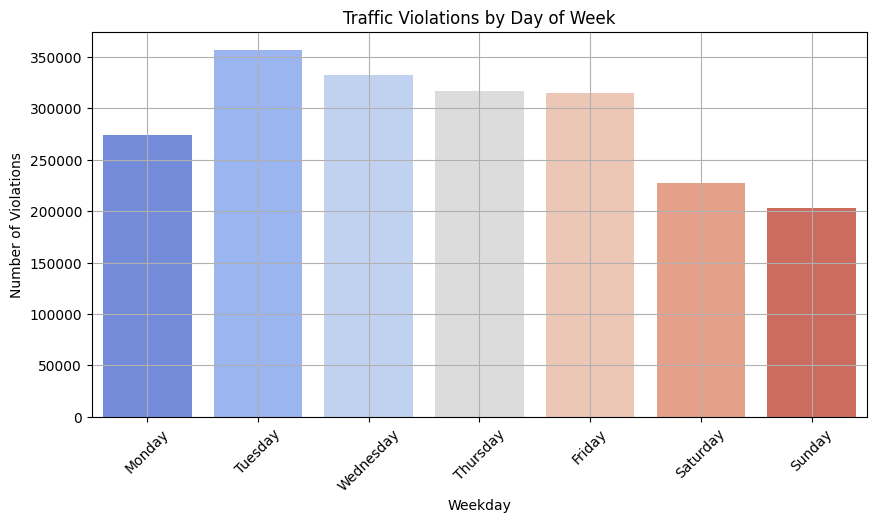

In [6]:
# Step 6: Plot - Violations by Weekday
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order, palette='coolwarm')
plt.title('Traffic Violations by Day of Week')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

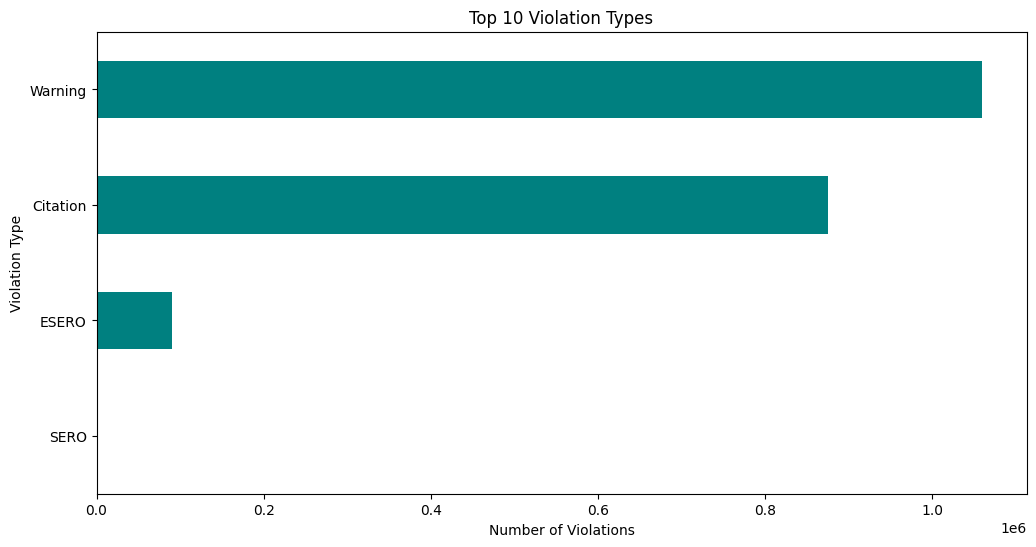

In [7]:
# Step 7: Most Common Violations
plt.figure(figsize=(12,6))
df['Violation Type'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Violation Types')
plt.xlabel('Number of Violations')
plt.gca().invert_yaxis()
plt.show()

In [8]:
# Step 8: Optional - Weather (if present)
if 'Weather' in df.columns:
    plt.figure(figsize=(12,6))
    df['Weather'].value_counts().head(10).plot(kind='barh', color='skyblue')
    plt.title('Top Weather Conditions in Violations')
    plt.xlabel('Number of Cases')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Weather column not present in the dataset.")

Weather column not present in the dataset.


In [9]:
# Step 9: Heatmap of Violation Hotspots
map_data = df[['Latitude', 'Longitude']].dropna().sample(n=1000, random_state=42)

heat_map = folium.Map(location=[map_data['Latitude'].mean(), map_data['Longitude'].mean()], zoom_start=11)
HeatMap(map_data, radius=8).add_to(heat_map)

heat_map  # Displays on Colab